# Multi-Armed Bandit Problem Implementation-BernoulliBandit

Hui Wang--PKU 20240924

Task Description:

Implement UCB (Upper Confidence Bound) and e-Greedy algorithms for a multi-armed bandit problem with k=10 arms.
Each arm's reward follows a Bernoulli distribution.
Provide a Python program that implements both algorithms and plots their performance comparison.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Enviroment

In [2]:
import numpy as np

class BernoulliBandit:
    """Bernoulli Multi-Armed Bandit, input K represents the number of arms to pull"""
    
    def __init__(self, K):
        # Initialize the probabilities of each arm
        self.probs = np.random.uniform(size=K) 
        # Find the index of the arm with the highest probability
        self.best_idx = np.argmax(self.probs)
        # Store the highest probability value
        self.best_prob = self.probs[self.best_idx]
        # Store the number of arms
        self.K = K
    
    def step(self, k):
        # If a random number is less than the probability of the selected arm, return 1 (win)
        if np.random.rand() < self.probs[k]:
            return 1
        # Otherwise, return 0 (loss)
        else:
            return 0

In [3]:
# Set the random seed for reproducibility
np.random.seed(0)
K = 10  # Number of arms
bernoulli_bandit_10_arm = BernoulliBandit(K)  # Create an instance of the BernoulliBandit class

# Print a statement about the number of arms
print(f"A Bernoulli bandit with {K} arms has been generated randomly.")
# Print the index of the arm with the highest probability and the probability itself
print(f"The arm with the highest winning probability is {bernoulli_bandit_10_arm.best_idx}, with a probability of {bernoulli_bandit_10_arm.best_prob:.4f}.")

A Bernoulli bandit with 10 arms has been generated randomly.
The arm with the highest winning probability is 8, with a probability of 0.9637.


# Solver

In [4]:
import numpy as np

class BernoulliSolver:
    """Basic framework for multi-armed bandit algorithms."""
    
    def __init__(self, bandit):
        self.bandit = bandit
        self.counts = np.zeros(self.bandit.K)  # Number of times each arm has been pulled
        self.regret = 0.0  # Cumulative regret at the current step
        self.reward = 0.0  # Cumulative reward at the current step
        self.actions = []  # Maintain a list to record the actions at each step
        self.regrets = []  # Maintain a list to record the cumulative regret at each step
        self.rewards = []  # Maintain a list to record the average reward after each step

    def update_regret(self, k):
        # Calculate the cumulative regret and save it, k is the index of the arm chosen this time
        self.regret += self.bandit.best_prob - self.bandit.probs[k]
        self.regrets.append(self.regret)
    
    def update_reward(self, r, i):
        self.reward += r
        self.rewards.append(self.reward / (i + 1))
        
    def run_one_step(self):
        # Return which arm to pull at the current step, implemented by each specific strategy
        raise NotImplementedError
    
    def run(self, num_steps):
        # Run for a certain number of times, num_steps is the total number of runs
        for i in range(num_steps):
            k, r = self.run_one_step()
            self.counts[k] += 1
            self.actions.append(k)
            self.update_regret(k)
            self.update_reward(r, i)

# Policy

1. epsilon-greedy

1.1. epsilon=0.01

In [5]:
import numpy as np

class BernoulliEpsilonGreedy(BernoulliSolver):
    """Epsilon-greedy algorithm, inherits from the BernoulliSolver class."""
    
    def __init__(self, bandit, epsilon=0.01, init_prob=1.0):
        super(BernoulliEpsilonGreedy, self).__init__(bandit)
        self.epsilon = epsilon
        # Initialize the estimated expected reward for each arm
        self.estimates = np.array([init_prob] * self.bandit.K)
    
    def run_one_step(self):
        if np.random.random() < self.epsilon:
            k = np.random.randint(0, self.bandit.K)  # Randomly choose an arm
        else:
            k = np.argmax(self.estimates)  # Choose the arm with the highest estimated expected reward
            
        r = self.bandit.step(k)  # Get the reward for this action
        
        # Update the estimate for the chosen arm
        self.estimates[k] += (1. / (self.counts[k] + 1)) * (r - self.estimates[k])
        return k, r

In [6]:
def plot_results_regrets(solvers, solver_names):
    for idx, solver in enumerate(solvers):
        # Create a list of time steps for plotting
        time_list = range(len(solver.regrets))
        # Plot the cumulative regrets over time for each solver
        plt.plot(time_list, solver.regrets, label=solver_names[idx])
    # Label the x-axis as 'Time steps'
    plt.xlabel('Time steps')
    # Label the y-axis as 'Cumulative regrets'
    plt.ylabel('Cumulative regrets')
    # Set the title of the plot to show the number of arms in the bandit
    plt.title('%d-armed bandit' % solvers[0].bandit.K)
    # Display the legend to identify each solver's plot line
    plt.legend()
    # Display the plot
    plt.show()

In [8]:
def plot_results_rewards(solvers, solver_names):
    for idx, solver in enumerate(solvers):
        # Create a list of time steps for plotting
        time_list = range(len(solver.rewards))
        # Plot the average rewards over time for each solver
        plt.plot(time_list, solver.rewards, label=solver_names[idx])
    # Label the x-axis as 'Time steps'
    plt.xlabel('Time steps')
    # Label the y-axis as 'Average rewards'
    plt.ylabel('Average rewards')
    # Set the title of the plot to show the number of arms in the bandit
    plt.title('%d-armed bandit' % solvers[0].bandit.K)
    # Display the legend to identify each solver's plot line
    plt.legend()
    # Display the plot
    plt.show()

Cumulative regret is: 29.993719243837358


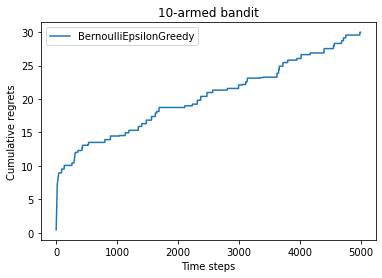

In [10]:
# Create an instance of the epsilon-greedy solver with the Bernoulli bandit
epsilon_greedy_solver = BernoulliEpsilonGreedy(bernoulli_bandit_10_arm, epsilon=0.01)
# Run the solver for 5000 steps
epsilon_greedy_solver.run(5000)
# Print the cumulative regret after running the solver
print('Cumulative regret is:', epsilon_greedy_solver.regret)
# Plot the cumulative regrets for the epsilon-greedy solver
plot_results_regrets([epsilon_greedy_solver], ["BernoulliEpsilonGreedy"])

Average reward is: 0.8786


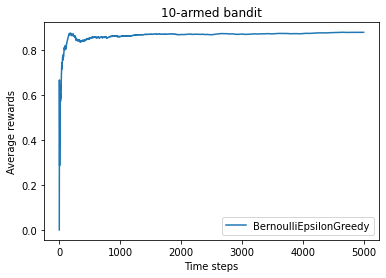

In [11]:
# Create an instance of the epsilon-greedy solver with the Bernoulli bandit
epsilon_greedy_solver = BernoulliEpsilonGreedy(bernoulli_bandit_10_arm, epsilon=0.01)
# Run the solver for 5000 steps
epsilon_greedy_solver.run(5000)
# Print the average reward after running the solver
print('Average reward is:', epsilon_greedy_solver.rewards[-1])
# Plot the average rewards for the epsilon-greedy solver
plot_results_rewards([epsilon_greedy_solver], ["BernoulliEpsilonGreedy"])

1.2. Different Epsilon value

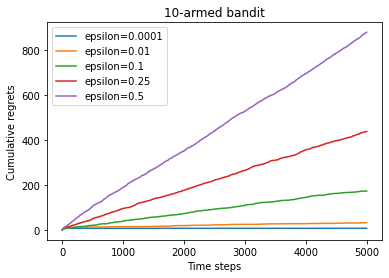

In [12]:
# Define a list of epsilon values to test
epsilons = [1e-4, 0.01, 0.1, 0.25, 0.5]
# Create a list of epsilon-greedy solvers with different epsilon values
epsilon_greedy_solver_list = [BernoulliEpsilonGreedy(bernoulli_bandit_10_arm, epsilon=e) for e in epsilons]
# Create a list of names for the solvers to use in the plot legend
epsilon_greedy_solver_names = ["epsilon={}".format(e) for e in epsilons]

# Run each solver for 5000 steps
for solver in epsilon_greedy_solver_list:
    solver.run(5000)
# Plot the cumulative regrets for all epsilon-greedy solvers
plot_results_regrets(epsilon_greedy_solver_list, epsilon_greedy_solver_names)

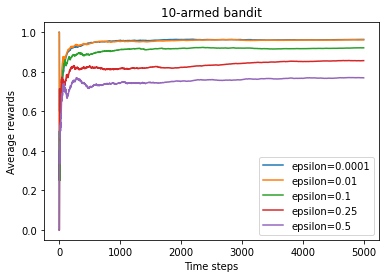

In [13]:
# Define a list of epsilon values to test
epsilons = [1e-4, 0.01, 0.1, 0.25, 0.5]
# Create a list of epsilon-greedy solvers with different epsilon values
epsilon_greedy_solver_list = [BernoulliEpsilonGreedy(bernoulli_bandit_10_arm, epsilon=e) for e in epsilons]
# Create a list of names for the solvers to use in the plot legend
epsilon_greedy_solver_names = ["epsilon={}".format(e) for e in epsilons]

# Run each solver for 5000 steps
for solver in epsilon_greedy_solver_list:
    solver.run(5000)
# Plot the average rewards for all epsilon-greedy solvers
plot_results_rewards(epsilon_greedy_solver_list, epsilon_greedy_solver_names)

1.3. Epsilon value decaying over time

In [15]:
import numpy as np

class BernoulliDecayingEpsilonGreedy(BernoulliSolver):
    """Epsilon-greedy algorithm with decaying epsilon value, inherits from the BernoulliSolver class."""
    
    def __init__(self, bandit, init_prob=1.0):
        super(BernoulliDecayingEpsilonGreedy, self).__init__(bandit)
        # Initialize the estimated expected reward for each arm
        self.estimates = np.array([init_prob] * self.bandit.K)
        # Initialize the total count of actions taken
        self.total_count = 0
    
    def run_one_step(self):
        # Increment the total count of actions
        self.total_count += 1
        # Calculate the decaying epsilon value
        self.choice_bar = 1 / self.total_count
        # Choose a random arm with probability equal to the decaying epsilon value
        if np.random.random() < self.choice_bar:
            k = np.random.randint(0, self.bandit.K)
        else:
            # Choose the arm with the highest estimated expected reward
            k = np.argmax(self.estimates)
            
        # Get the reward for the chosen arm
        r = self.bandit.step(k)
        
        # Update the estimate for the chosen arm
        self.estimates[k] += (1. / (self.counts[k] + 1)) * (r - self.estimates[k])
        
        return k, r

Cumulative regret is: 10.007914210701355


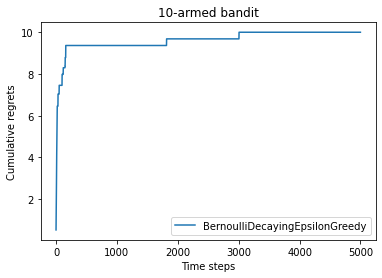

In [16]:
# Create an instance of the decaying epsilon-greedy solver with the Bernoulli bandit
decaying_epsilon_greedy_solver = BernoulliDecayingEpsilonGreedy(bernoulli_bandit_10_arm)
# Run the solver for 5000 steps
decaying_epsilon_greedy_solver.run(5000)
# Print the cumulative regret after running the solver
print('Cumulative regret is:', decaying_epsilon_greedy_solver.regret)
# Plot the cumulative regrets for the decaying epsilon-greedy solver
plot_results_regrets([decaying_epsilon_greedy_solver], ["BernoulliDecayingEpsilonGreedy"])

1.4. UCB(Upper confidence bound)

In [17]:
import numpy as np

class UCB(BernoulliSolver):
    """UCB algorithm, inherits from the BernoulliSolver class."""
    
    def __init__(self, bandit, coef, init_prob=1.0):
        super(UCB, self).__init__(bandit)
        self.total_count = 0
        # Initialize the estimated expected reward for each arm
        self.estimates = np.array([init_prob] * self.bandit.K)
        self.coef = coef  # Confidence coefficient
    
    def run_one_step(self):
        # Increment the total count of actions
        self.total_count += 1
        # Calculate the Upper Confidence Bound (UCB) for each arm
        ucb = self.estimates + self.coef * np.sqrt(np.log(self.total_count) / (2 * (self.counts + 1)))
        # Choose the arm with the highest UCB value
        k = np.argmax(ucb)
        # Get the reward for the chosen arm
        r = self.bandit.step(k)
        # Update the estimate for the chosen arm
        self.estimates[k] += (1. / (self.counts[k] + 1)) * (r - self.estimates[k])
        
        return k, r

Cumulative regret for the UCB algorithm is: 90.91682864165895


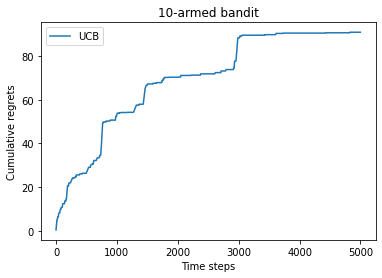

Average reward for the UCB algorithm is： 0.9424


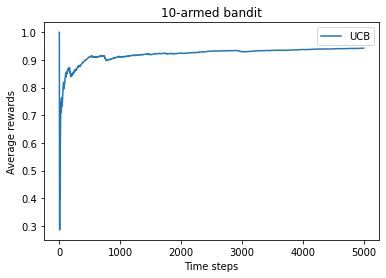

In [19]:
# Set the coefficient that controls the trade-off between exploration and exploitation
coef = 1
# Create an instance of the UCB solver with the Bernoulli bandit and the specified coefficient
UCB_solver = UCB(bernoulli_bandit_10_arm, coef)
# Run the UCB solver for 5000 steps
UCB_solver.run(5000)
# Print the cumulative regret after running the UCB solver
print('Cumulative regret for the UCB algorithm is:', UCB_solver.regret)
# Plot the cumulative regrets for the UCB solver
plot_results_regrets([UCB_solver], ["UCB"])

# Print the final average reward
print('Average reward for the UCB algorithm is：', UCB_solver.rewards[-1])

# Plot the average rewards for the UCB solver
plot_results_rewards([UCB_solver], ["UCB"])

## UCB vs. Epsilon-Greedy

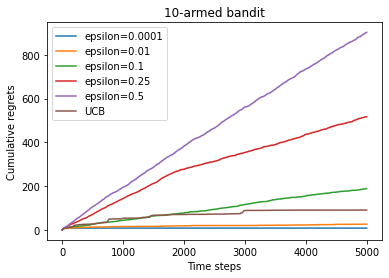

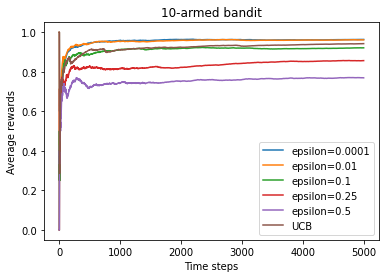

In [20]:
# Combine the solver lists
solver_list = epsilon_greedy_solver_list + [UCB_solver]

# Combine the solver names
solver_names = epsilon_greedy_solver_names + ["UCB"]

# Plot the average regrets and rewards for all solvers
plot_results_regrets(solver_list, solver_names)
plot_results_rewards(solver_list, solver_names)